# CS 533 Assignment 4
## Introduction
The key objective for this assignment is to get familiarize with linear regression and simulations to study statistical techniques. The basic outlines of this assignment are:
* To give you more experience with linear regression
* To introduce simulation as a means of studying the behavior of statistical technique

## Environment Setup
We will be using **pandas** and **numpy** for data processing and manipulation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Data

## Analysis


In [2]:
# Functions that will be reused
rng = np.random.default_rng(20201014)

### 1. Correlation
If two variables are independent, their correlation should be zero, right? We can simulate this by drawing two arrays of 100 standard normal variables each, and computing their correlation coefficient:
* $x ∼ Normal(0,1)$
* $y ∼ Normal(0,1)$

If we want to generate correlated variables, we can do so by combining two random variables to form a third:
* $z = x + y$

In [3]:
def simulate_correlation(no_of_iterations=0, no_of_samples=0, related=False):
    """
        Params:
            no_of_iterations(int) : number of iterations for simulation
            no_of_samples(int) : number of data to sample in each iteration
            related(bool) : generates correlated variable
    """
    correlation_coefficients = np.empty(no_of_iterations)
    for i in range(no_of_iterations):
        xs = pd.Series(rng.standard_normal(no_of_samples))
        ys = pd.Series(rng.standard_normal(no_of_samples))
        if related:
            ys = xs + ys
        correlation_coefficients[i] = xs.corr(ys)
    lb, ub = np.quantile(correlation_coefficients, [0.025, 0.975])
    print("Simulation Summary")
    print("===============================================================")
    print(f"Number of Sample: {no_of_samples}")
    print(f"Number of Simulation runs: {no_of_iterations}")
    print(f"Mean: {np.mean(correlation_coefficients)}") 
    print(f"Variance: {np.var(correlation_coefficients)}")
    print(f"Confidence Interval: {lb}, {ub}")
    print(f"Confidence Interval Width: {ub-lb}")

    sns.displot(correlation_coefficients, kde=True)
    plt.axvline(lb, color="orange")
    plt.axvline(ub, color="orange")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Frequency")
    title = "Independent" if not related else "Correlated"
    plt.title(f"Distribution of Correlation Coefficients ({title} Variables)")
    plt.show()

✅ Run 1000 iterations of this simulation to compute 1000 correlation coefficients. What is the mean and variance of these simulated coefficients? Plot their distribution. Are the results what you expect for computing correlations of uncorrelated variables?

Simulation Summary
Number of Sample: 100
Number of Simulation runs: 1000
Mean: -0.0021605778927432685
Variance: 0.010284645619964254
Confidence Interval: -0.20249181112517997, 0.19523944237843205
Confidence Interval Width: 0.39773125350361205


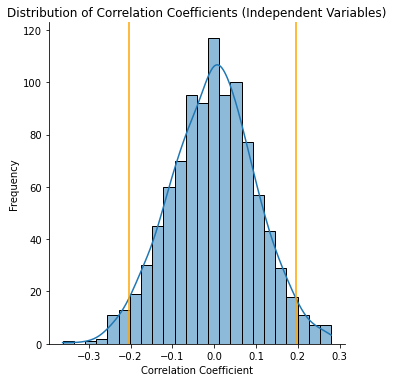

In [4]:
simulate_correlation(no_of_iterations=1000, no_of_samples=100)

* The variables we took for this simulation are $x$ and $y$ that follows standard normal distribution and not correlated to each other. Thus, the correlation coefficient should be nearly zero indicating no correlation between them.
* After 1000 iteration of simulation of drawing 100 variables, the mean and variance of correlation coefficient is -0.0022 and 0.01. 
* The result of simulation aligns with the expectations of computing correlation between uncorrelated variables i.e. correlation coefficient is almost zero.

✅ Repeat the previous simulation, but using 1000 draws per iteration instead of 100. How does this change the mean and variance of the resulting coefficients?

Simulation Summary
Number of Sample: 1000
Number of Simulation runs: 1000
Mean: 0.000515034038739193
Variance: 0.0010042545746599212
Confidence Interval: -0.056625437991341135, 0.0641652000937096
Confidence Interval Width: 0.12079063808505074


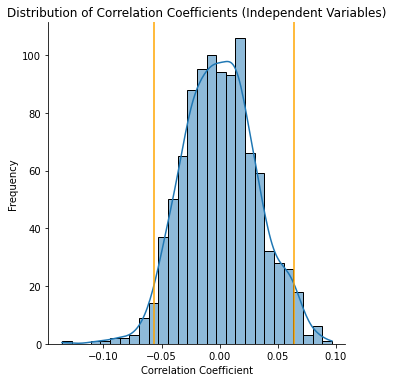

In [5]:
simulate_correlation(no_of_iterations=1000, no_of_samples=1000)

Taking 1000 sample per iteration instead of 100, the mean i.e. correlation coefficient is more closer to zero and the variance is lower than that while taking 100 samples. Also, the 95% Confidence Interval is shorter than the one while drawing 100 samples.

✅ Run 1000 iterations simulating these correlated variables to compute 100 correlation coefficients (xs.corr(zs)). Compute the mean and variance of these coefficients, and plot their distributions. Does this match what we expect from the analytic results? What happens when we compute correlations of 1000-element arrays in each iteration? What about 10000-element arrays?

Simulation Summary
Number of Sample: 100
Number of Simulation runs: 1000
Mean: 0.704899094474247
Variance: 0.0027969280461580715
Confidence Interval: 0.5917069780354121, 0.7988543721128598
Confidence Interval Width: 0.20714739407744776


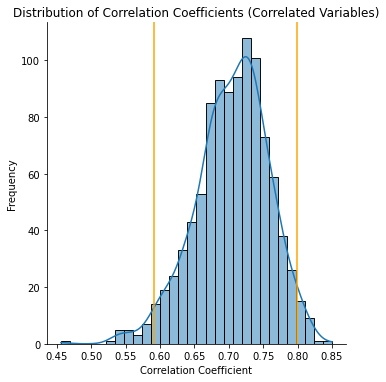

In [6]:
simulate_correlation(no_of_iterations=1000, no_of_samples=100, related=True)

* The variables we took for this simulation are $x$ and $y$ that follows standard normal distribution. $x$ and $x + y$ are correlated to each other and ideally the correlation coefficient will be 0.707.
* After 1000 iteration of simulation of drawing 100 variables, the mean and variance of correlation coefficient is 0.705 and 0.003. 
* The result of simulation aligns with the expectations of computing correlation between correlated variables and the mean correlation coefficient is nearly equal to the analytical correlation coefficient i.e. 0.707.

Simulation Summary
Number of Sample: 1000
Number of Simulation runs: 1000
Mean: 0.7073312756086325
Variance: 0.0002557984133277131
Confidence Interval: 0.6733154109351417, 0.7370756787732807
Confidence Interval Width: 0.06376026783813904


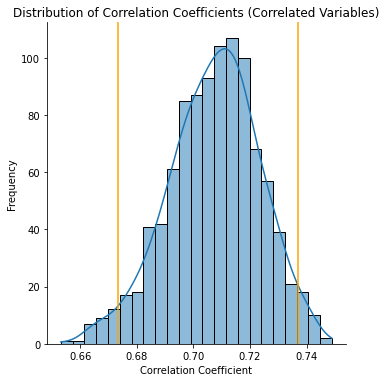

In [7]:
simulate_correlation(no_of_iterations=1000, no_of_samples=1000, related=True)

Taking 1000 sample per iteration instead of 100, the mean  i.e. correlation coefficient is more closer to 0.707 and the variance is lower than that while taking 100 samples. Also, the 95% Confidence Interval is shorter than the one while drawing 100 samples.

Simulation Summary
Number of Sample: 10000
Number of Simulation runs: 1000
Mean: 0.7071694143855494
Variance: 2.4534653168616476e-05
Confidence Interval: 0.6975220542679544, 0.7165142874301409
Confidence Interval Width: 0.018992233162186456


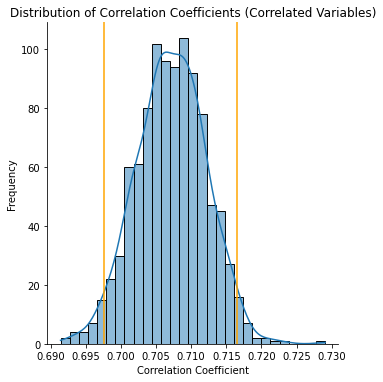

In [8]:
simulate_correlation(no_of_iterations=1000, no_of_samples=10000, related=True)

Taking 10000 sample per iteration instead of 1000, the mean i.e. correlation coefficient is more closer to 0.707 and the variance is even lower than that while taking 1000 samples. Also, the 95% Confidence Interval is shorter than the one while drawing 100 samples.

### 2. Linear Regression
If we want to simulate a single-variable linear regression:\
$y = α + βx + ϵ$
there are four things we need to control:
* the distribution of $x$
* the intercept $α$
* the slope $β$
* the variance of errors $σ^2ϵ$

Remember that the linear regression model assumes errors are i.i.d. normal, and the OLS model will result in a mean error of 0; thus we have $ϵ ∼ Normal(0, σϵ)$. Sampling data for this model involves the following steps:

1. Sample x
2. Sample ϵ
3. Compute $y = α + βx + ϵ$

Let’s start with a very simple example: x is drawn from a standard normal, $α=0$, $β=1$, and $σ^2ϵ=1$.

In [9]:
def draw_assumption_check_plot(fit):
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,7))
    sns.regplot(x=fit.fittedvalues, y=fit.resid, ax=ax1)
    ax1.set_xlabel("Fitted")
    ax1.set_ylabel("Residuals")
    ax1.set_title("Residuals vs. Fitted")
    sm.qqplot(fit.resid, fit=True, line="45", ax=ax2)
    ax2.set_title("Residuals")
    plt.show()

def fit_linear_data(no_of_samples, alpha=0, beta=1):
    xs = rng.standard_normal(no_of_samples)
    errs = rng.standard_normal(no_of_samples)
    ys = alpha + beta * xs + errs
    data = pd.DataFrame({
        "X": xs,
        "Y": ys
    })
    model = smf.ols('Y ~ X', data=data)
    fit = model.fit()
    print(fit.summary())
    _, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))
    sns.regplot(x="X", y="Y", data=data, ax=ax1)
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_title("Scatter plot of data")
    sns.regplot(x=fit.fittedvalues, y=fit.resid, ax=ax2)
    ax2.set_xlabel("Fitted")
    ax2.set_ylabel("Residuals")
    ax2.set_title("Residuals vs. Fitted")
    sm.qqplot(fit.resid, fit=True, line="45", ax=ax3)
    ax3.set_title("Residuals")
    plt.show()


def simulate_linear_regression(no_of_iterations=0, no_of_samples=0, alpha=0, beta=1):
    intercepts = np.empty(no_of_iterations)
    slopes = np.empty(no_of_iterations)
    rsquareds = np.empty(no_of_iterations)
    for i in range(no_of_iterations):
        xs = rng.standard_normal(no_of_samples)
        errs = rng.standard_normal(no_of_samples)
        ys = alpha + beta * xs + errs
        data = pd.DataFrame({
            "X": xs,
            "Y": ys
        })
        model = smf.ols('Y ~ X', data=data)
        fit = model.fit()
        intercepts[i] = fit.params["Intercept"]
        slopes[i] = fit.params["X"]
        rsquareds[i] = fit.rsquared 

    if no_of_iterations > 1:
        lb_i, ub_i = np.quantile(intercepts, [0.025, 0.975])
        lb_s, ub_s = np.quantile(slopes, [0.025, 0.975])
        lb_r, ub_r = np.quantile(rsquareds, [0.025, 0.975])
        print("Simulation Summary")
        print("=======================================================================================================")
        summary = [
            ["Intercept", np.mean(intercepts), np.var(intercepts), f"{lb_i}, {ub_i}", ub_i-lb_i],
            ["Slope", np.mean(slopes), np.var(slopes), f"{lb_s}, {ub_s}", ub_s-lb_s], 
            ["Rsquared", np.mean(rsquareds), np.var(rsquareds), f"{lb_r}, {ub_r}", ub_r-lb_r]
            ]
        df = pd.DataFrame(
            summary, 
            columns=["Coefficients", "Mean", "Variance", "Confidence Interval", "Confidence Interval Width"]
        ).set_index("Coefficients")
        print(df.to_string())

        _, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))
        sns.histplot(intercepts, kde=True, ax=ax1)
        ax1.axvline(lb_i, color="gray")
        ax1.axvline(ub_i, color="gray")
        ax1.set_xlabel("Intercept")
        ax1.set_ylabel("Frequency")
        ax1.set_title(f"Distribution of Intercept")

        sns.histplot(slopes, kde=True, ax=ax2)
        ax2.axvline(lb_s, color="gray")
        ax2.axvline(ub_s, color="gray")
        ax2.set_xlabel("Slope")
        ax2.set_ylabel("Frequency")
        ax2.set_title(f"Distribution of Slope")

        sns.histplot(rsquareds, kde=True, ax=ax3)
        ax3.axvline(lb_r, color="gray")
        ax3.axvline(ub_r, color="gray")
        ax3.set_xlabel("Rsquared")
        ax3.set_ylabel("Frequency")
        ax3.set_title(f"Distribution of Rsquared")

        plt.show()


✅ Fit a linear model to this data, predicting $Y$ with $X$. What are the intercept and slope? What is $R^2$? Are these values what you expect? Plot residuals vs. fitted and a Q-Q plot of residuals to check the model assumptions - do they hold?

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     971.5
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          1.75e-149
Time:                        12:23:48   Log-Likelihood:                -1412.8
No. Observations:                1000   AIC:                             2830.
Df Residuals:                     998   BIC:                             2840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0137      0.031     -0.436      0.6

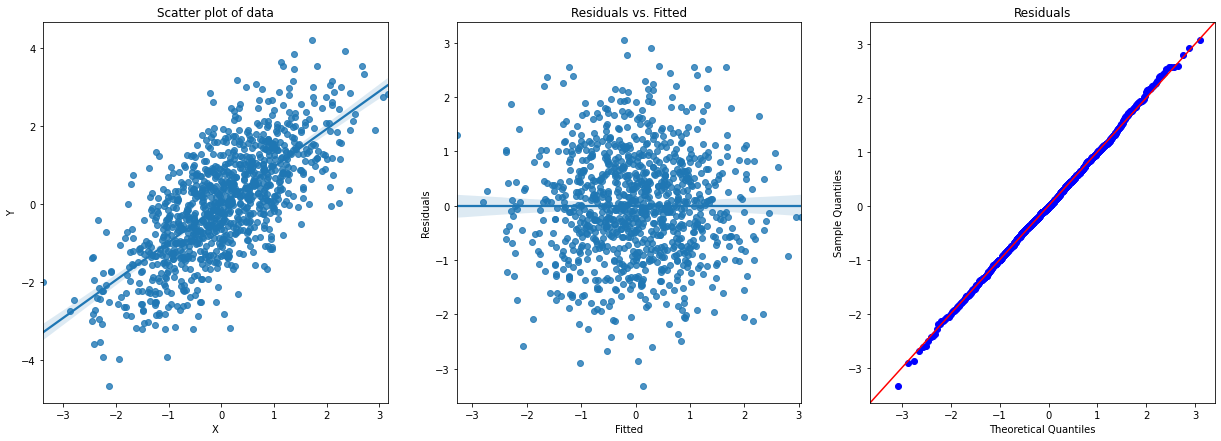

In [10]:
fit_linear_data(no_of_samples=1000, alpha=0, beta=1)

The value used for intercept was 0 and for the slope was 1. 
* The intercept is -0.0137 and the slope is 0.9688.
* The $R^2$ value is 0.493. This indicates that only 49.3% of the variance in the dependent variable is explained by the model. Hence, it is not a good fit.
* The intercept and slope values are nearly equal to the value we used. Thus, those are values what we expect.
* Assumptions check
  * The scatter plot shows that data are almost linear but variance is higher. The scatter plot shows that line seems to fit.
  * Points are almost equally distributed above and below the regression line showing no specific pattern in Fitted vs Residual plot. Thus Homoskedasticity property of errors is not violated.
  * The Q-Q plot shows that errors seem to have a normal distributions with some outliers at the end. Hence, we can say that errors are not distributed normally.

Thus, the assumption for the linear model does hold for the data. However, almost 50% of the dependent variable goes unexplained while using this model. Thus, the linear model is not a good fit.

✅ Repeat the simulation 1000 times, fitting a linear model each time. Show the mean, variance, and a distribution plot of the intercept, slope, and $R^2$ from these simulations.

Simulation Summary
                  Mean  Variance                        Confidence Interval  Confidence Interval Width
Coefficients                                                                                          
Intercept    -0.001257  0.000996  -0.06378182002318354, 0.06006816746366142                   0.123850
Slope         0.999735  0.001038      0.9374778686205958, 1.061043226294309                   0.123565
Rsquared      0.499220  0.000498    0.45526274983224796, 0.5410769621017816                   0.085814


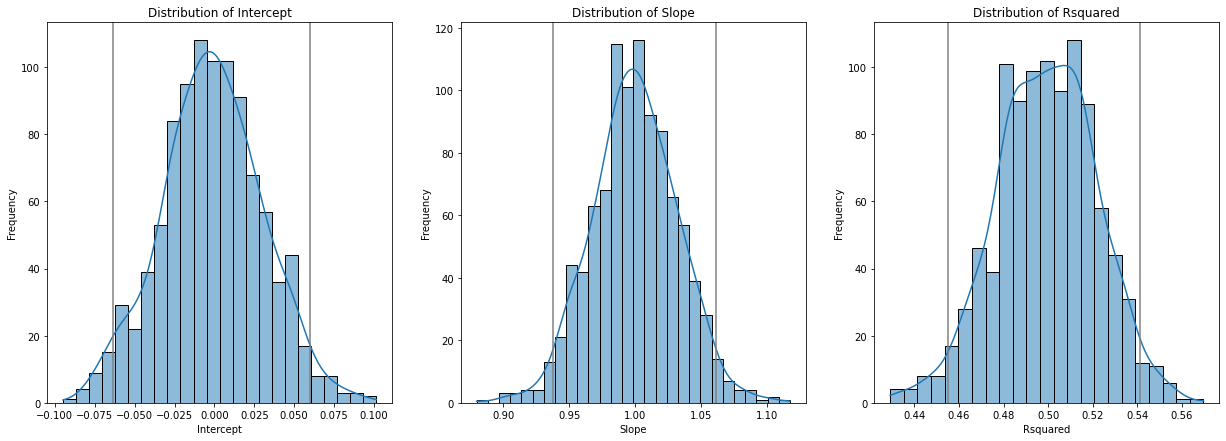

In [11]:
simulate_linear_regression(no_of_iterations=1000, no_of_samples=1000, alpha=0, beta=1)

The value used for intercept was 0 and for the slope was 1. 
* The mean intercept is -0.001257 and the variance is 0.000996.
* The mean slope is 0.999735 and the variance is 0.001038.
* The mean  $R^2$ is 0.499220 and the variance is 0.000498.
* Distribution of Intercept, Slope and $R^2$ is normal and is shown with confidence intervals respectively.

✅ Fit a model to data with $α=1$ and $β=4$. Are the resulting model parameters what you expect? How did $R^2$ change, and why? Do the linear model assumptions still hold? What are the distributions of the slope, intercept, and $R^2$ if you do this 1000 times?

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:24:02   Log-Likelihood:                -1433.3
No. Observations:                1000   AIC:                             2871.
Df Residuals:                     998   BIC:                             2881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9934      0.032     30.928      0.0

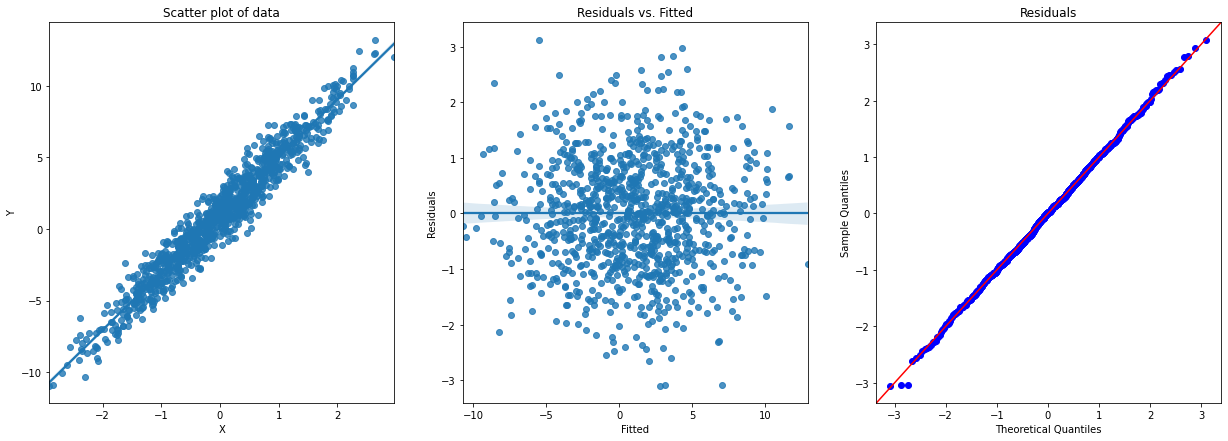

In [12]:
fit_linear_data(no_of_samples=1000, alpha=1, beta=4)

The value used for intercept was 1 and for the slope was 4. 
* The intercept is 0.9934 and the slope is 4.0256.
* The $R^2$ value is 0.94. This indicates that almost 94% of the variance in the dependent variable is explained by the model. This value is higher than the previous model that indicates it is better fit than previous model
* The intercept and slope values are nearly equal to the value we used. Thus, those are values what we expect.
* Assumptions
  * The scatter plot shows that data are almost linear but variance is higher. The scatter plot shows that line seems to fit.
  * Points are almost equally distributed above and below the regression line showing no specific pattern in Fitted vs Residual plot. Thus Homoskedasticity property of errors is not violated.
  * The Q-Q plot shows that errors seem to have a normal distributions with some outliers at the end. Hence, we can say that errors are not distributed normally.

Thus, the assumption for the linear model does hold for the data. Almost 94% of the dependent variable can be explained while using this model. Thus, the linear model is a good fit and far better than the previous model.

Simulation Summary
                  Mean  Variance                     Confidence Interval  Confidence Interval Width
Coefficients                                                                                       
Intercept     1.000431  0.001037  0.9364192431741768, 1.0658996151939588                   0.129480
Slope         4.000390  0.001067    3.937800982019679, 4.063639510005097                   0.125839
Rsquared      0.941109  0.000013  0.9339723367168669, 0.9477408994146986                   0.013769


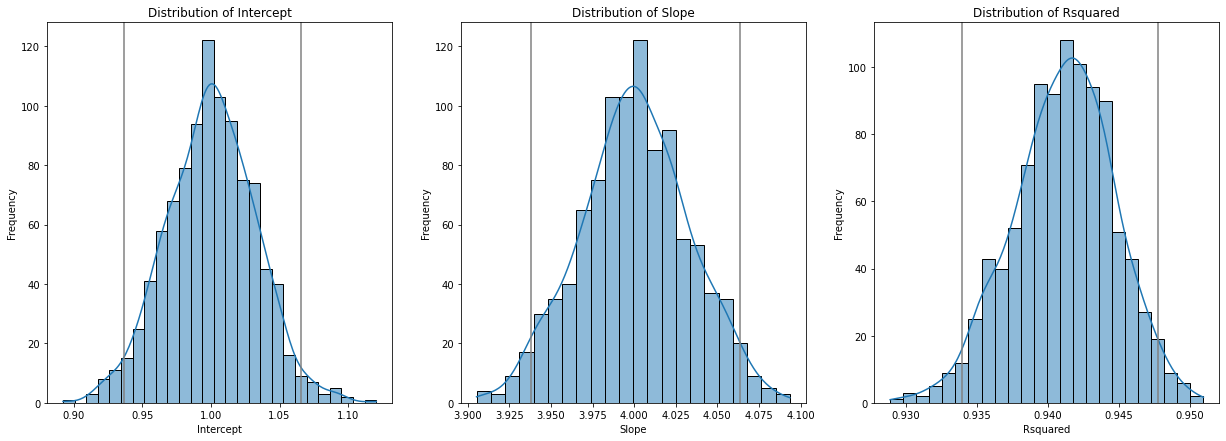

In [13]:
simulate_linear_regression(no_of_iterations=1000, no_of_samples=1000, alpha=1, beta=4)

The value used for intercept was 1 and for the slope was 4. 
* The mean intercept is 1.000431 and the variance is 0.001037.
* The mean slope is 4.000390 and the variance is 0.001067.
* The mean  $R^2$ is 0.941109 and the variance is 0.000013.
* Distribution of Intercept, Slope and $R^2$ is normal and is shown with confidence intervals respectively.

### 3. Nonlinear Data

✅ Generate 1000 data points with the following distributions and formula:

* $x ∼ Normal(0, 1)$
* $ϵ ∼ Normal(0, 5)$
* $y = 10 + 5e^x + ϵ$

In [14]:
xs = rng.normal(0, 1, 1000)
errs = rng.normal(0, 5, 1000)
ys = 10 + 5*np.exp(xs) + errs
nonlinear_data = pd.DataFrame({
    "X": xs,
    "Y": ys
})


✅ Fit a linear model predicting $y$ with $x$. How well does the model fit? Do the assumptions seem to hold?

In [15]:
non_linear_data_model = smf.ols("Y ~ X", data = nonlinear_data)
non_linear_data_model_fit = non_linear_data_model.fit()
non_linear_data_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     819.5
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          4.56e-132
Time:                        12:24:17   Log-Likelihood:                -3582.2
No. Observations:                1000   AIC:                             7168.
Df Residuals:                     998   BIC:                             7178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5036      0.276     67.021      0.000      17.962      19.045
X              8.0341      0.281     28.627      0.000       7.483       8.585
==============================================================================
Omnibus:                     1222.479   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           292289.489
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                      85.917   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The intercept is 18.5036 and the slope is 8.0341.
* The $R^2$ value is 0.451. This indicates that only 45.1% of the variance in the dependent variable is explained by the model.

Almost 55% of the dependent variable can goes unexplained while using this model. Thus, the linear model is not a good fit.

✅ Draw a scatter plot of $x$ and $y$.

<AxesSubplot:xlabel='X', ylabel='Y'>

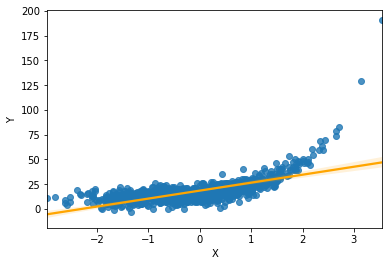

In [16]:
sns.regplot(x="X", y="Y", data=nonlinear_data, line_kws={"color": "orange"})

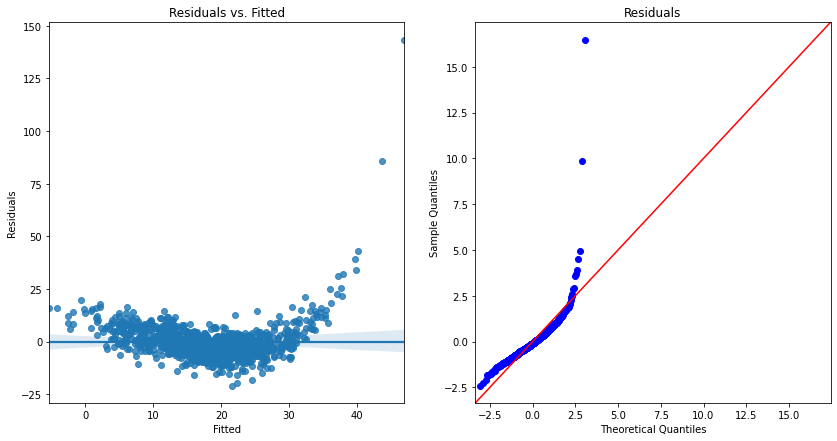

In [17]:
draw_assumption_check_plot(non_linear_data_model_fit)


* Assumptions
  * The line seems to fit the data only at the mid cluster of data. We can see a slight curve pattern in the scatter plot. A linear line won't fit the data properly.
  * We can see a pattern in the Fitted VS Residual plot. Points are above the regression line at the start and end of the data with more data clustered toward the bottom half of the line. Thus, violating the Homoskedasticity property of errors.
  * There is a slight curve at the start of the line with a sharp curve at the top of the line with few values way farther form the ideal line. Hence, we cannot say that errors are distributed normally.
  
  
Thus, the assumption for the linear model doesn't hold for the data.

✅ Repeat with $y = -2 + 3x^3 + ϵ$

In [18]:
ys = -2 + 3*np.power(xs, 3) + errs
nonlinear_data_cube = pd.DataFrame({
    "X": xs,
    "Y": ys
})
nonlinear_data_cube_model = smf.ols("Y ~ X", data = nonlinear_data_cube)
nonlinear_data_cube_model_fit = nonlinear_data_cube_model.fit()
nonlinear_data_cube_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     987.1
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          3.37e-151
Time:                        12:24:19   Log-Likelihood:                -3564.6
No. Observations:                1000   AIC:                             7133.
Df Residuals:                     998   BIC:                             7143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5160      0.271     -5.589      0.000      -2.048      -0.984
X              8.6632      0.276     31.418      0.000       8.122       9.204
==============================================================================
Omnibus:                      641.292   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45724.121
Skew:                           2.153   Prob(JB):                         0.00
Kurtosis:                      35.846   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The intercept is -1.5160 and the slope is 8.6632.
* The $R^2$ value is 0.497. This indicates that only 49.7% of the data is explained by this model that is a little bit more than the previous one.


Almost 50% of the dependent variable can goes unexplained while using this model. Thus, the linear model is not a good fit. 

<AxesSubplot:xlabel='X', ylabel='Y'>

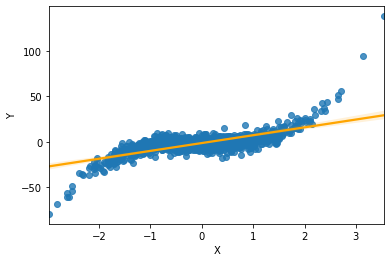

In [19]:
sns.regplot(x="X", y="Y", data=nonlinear_data_cube, line_kws={"color": "orange"})

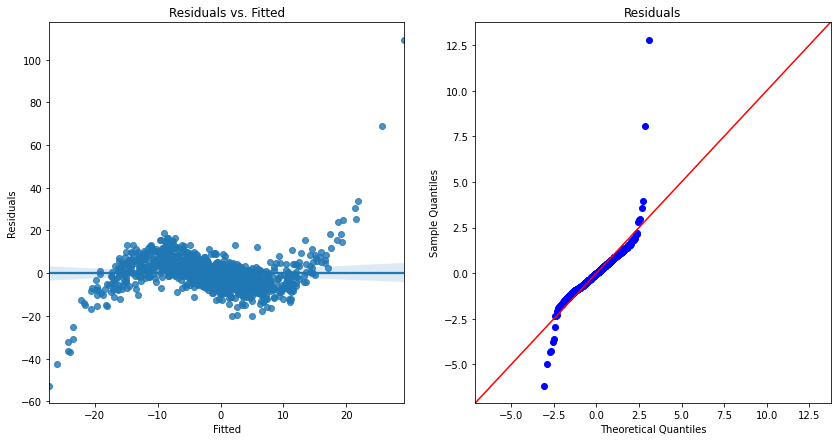

In [20]:
draw_assumption_check_plot(nonlinear_data_cube_model_fit)

* Assumptions
  * The line seems to fit the data only at the mid cluster of data. We can see a slight curve pattern at the both end in the scatter plot. A linear line won't fit the data properly.
  * We can see a pattern in the Fitted VS Residual plot. Points are below the regression line at the start. Then the data curves downward with a final curve that directs data upward with points above the regression line. Thus, violating the Homoskedasticity property of errors.
  * We can see a lot of outliers at the start and end of the data. Also, it seems that the middle part fits the line but we can see a light tilt of data against the 45 degree line. Hence, we cannot say that errors are distributed normally.
  
Thus, the assumption for the linear model doesn't hold for the data.

### 4. Non-Normal Covariates

✅ Generate 1000 data points with the model:

* $y = 10 + 0.3x + ϵ$
* $ϵ ∼ Normal(0, 1)$
* $x ∼ Gamma(2, 1)$

In [21]:
xs = rng.gamma(2, 1, 1000)
errs = rng.normal(0, 1, 1000)
ys = 10 + 0.3*xs + errs
non_normal_data = pd.DataFrame({
    "X": xs,
    "Y": ys
})

✅ Plot the distributions of $X$ and $Y$

<AxesSubplot:xlabel='X', ylabel='Y'>

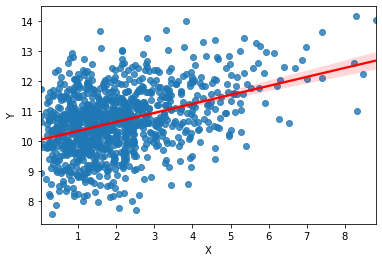

In [22]:

sns.regplot(x="X", y="Y", data=non_normal_data, line_kws={"color": "red"})

* Data seems to be clustered at the one side of the plot.
* The variance of Y seems to be a little bit higher for a linear model to explain.

✅ Fit a linear model predicting $y$ with $x$

In [23]:
non_normal_data_model = smf.ols("Y ~ X", data = non_normal_data)
non_normal_data_model_fit = non_normal_data_model.fit()
non_normal_data_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           7.40e-38
Time:                        12:24:21   Log-Likelihood:                -1421.6
No. Observations:                1000   AIC:                             2847.
Df Residuals:                     998   BIC:                             2857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0363      0.056    178.533      0.000       9.926      10.147
X              0.3013      0.022     13.417      0.000       0.257       0.345
==============================================================================
Omnibus:                        0.715   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.736
Skew:                          -0.065   Prob(JB):                        0.692
Kurtosis:                       2.970   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The intercept is 10.0363 and the slope is 0.3013.
* The $R^2$ value is 0.153. This indicates that only 15.3% of the data is explained by this model that is a little bit more than the previous one.

✅ How well does this model fit? How much of the variance does it explain? Do the assumptions seem to hold? Does the linear regression teem appropriate to the data?

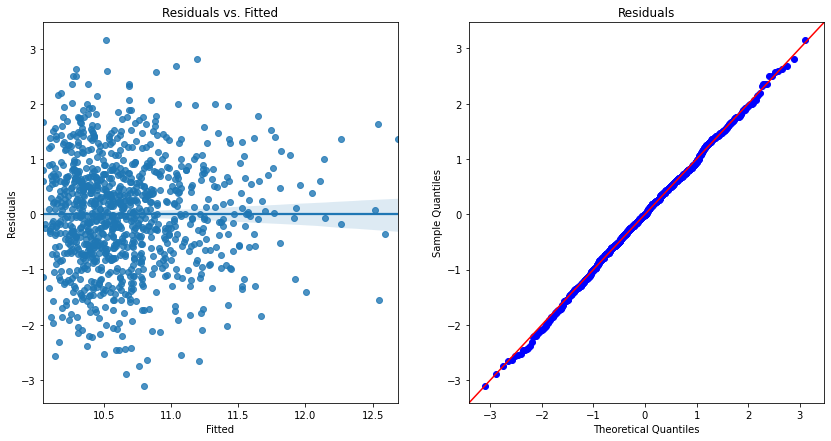

In [24]:
draw_assumption_check_plot(non_normal_data_model_fit)

Almost 85% of the dependent variable can goes unexplained while using this model only explaining 15% of the variance of the dependent variable. Thus, the linear model is a bad fit for the data.



* Assumptions check
  * The data is clustered more at the start of the plot and the variance in $y$ is very high too. A linear line won't fit the data properly.
  * We can see a pattern in the Fitted VS Residual plot. Variance in the start seems higher that seems to decrease continually. Thus, violating the Homoskedasticity property of errors.
  * We can see a few of outliers at the start and end of the data. It seems the error almost fits the line with few small curves. Hence, we can say that errors are distributed normally.
  
Thus, the assumption for the linear model doesn't hold for the data as most of the checkpoints doesn't meet.

### 5. Multiple Regression

We will use the following data generating process:

* $x1 ∼ Normal(10, 2)$
* $x2 ∼ Normal(-2, 5)$
* $ϵ ∼ Normal(0, 1)$
* $y ∼ 1 + 0.5x_1 + 3x_2 + ϵ$

✅ Fit a linear model $y ∼ x1 + x2$ on 1000 data points drawn from this model. What are the intercept and coefficients from the model? Are they what you expect? Check the model assumptions — do they hold?

In [25]:
errs = rng.normal(0, 1, 1000)
xs = rng.multivariate_normal([10, -2], [[2, 0], [0, 5]], 1000)
multi_variate_data = pd.DataFrame(xs, columns=["X1", "X2"])
multi_variate_data["Y"] = 1 + 0.5*multi_variate_data["X1"] + 3*multi_variate_data["X2"] + errs
model = smf.ols("Y ~ X1 + X2", data = multi_variate_data)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.395e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:24:22   Log-Likelihood:                -1395.3
No. Observations:                1000   AIC:                             2797.
Df Residuals:                     997   BIC:                             2811.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3408      0.232      5.789      0.000       0.886       1.795
X1             0.4705      0.023     20.686      0.000       0.426       0.515
X2             2.9846      0.014    218.012      0.000       2.958       3.011
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.410
Skew:                           0.049   Prob(JB):                        0.815
Kurtosis:                       3.011   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The intercept is 1.3408, the coefficient of X1 is 0.4705, and the coefficient of X2 is 2.9846.
* The $R^2$ value is 0.980. This indicates that almost 98% of the data is explained by this model.

The value we use for intercept is 1, the coefficient of X1 is 0.5 and the coefficient of X2 is 3. The value of these variable we get from the model is almost similar to of what we use. They are as what we expect them to be.

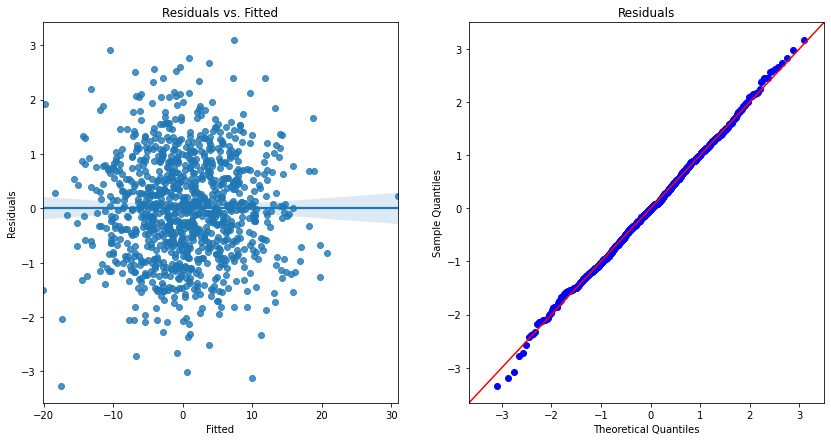

In [26]:
draw_assumption_check_plot(fit)

The model almost explains 98% variance of the dependent data. Thus, this model can be considered a good fit.
* Assumptions check
  * Points are almost equally distributed above and below the regression line showing no specific pattern in Fitted vs Residual plot. Thus Homoskedasticity property of errors is not violated.
  * The Q-Q plot shows that errors seem to have a normal distributions with some outliers at the start and end. Hence, we can say that errors are distributed normally.

Thus, the assumption for the linear model does hold for the data. Almost 98% of the dependent variable can be while using this model. Thus, the linear model is a good fit.

### 6. Correlated Predictors

We’re going to use the multivariate normal from the hint in the previous part to draw correlated variables X1 and X2 to use as predictors. We will use the following procedure:
1. Draw 1000 samples of variables $X1$ and $X2$ from a multivariate normal with means ⟨1,3⟩, variances of 1, and a covariance $Cov(X1,X2)=0.85$:\
`xs = rng.multivariate_normal([1, 3], [[1, 0.85], [0.85, 1]], 1000)`
2. Draw $ϵ ∼ Normal(0,2)$
3. Compute $y = 3 + 2x_1 + 3x_2 + ϵ$


In [27]:
def simulate_correlated_predictors(epoch=100):
    intercepts = np.empty(epoch)
    slopex1 = np.empty(epoch)
    slopex2 = np.empty(epoch)
    for i in range(epoch):
        xs = rng.multivariate_normal([1, 3], [[1, 0.85], [0.85, 1]], 1000)
        multi_variate_corr_data = pd.DataFrame(xs, columns=["X1", "X2"])
        errs = rng.normal(0, 2, 1000)
        multi_variate_corr_data["Y"] = 3 + 2*multi_variate_corr_data["X1"] + 3*multi_variate_corr_data["X2"] + errs
        multi_variate_corr_data_model = smf.ols("Y ~ X1 + X2", data = multi_variate_corr_data)
        multi_variate_corr_data_model_fit = multi_variate_corr_data_model.fit()
        intercepts[i] = multi_variate_corr_data_model_fit.params["Intercept"]
        slopex1[i] = multi_variate_corr_data_model_fit.params["X1"]
        slopex2[i] = multi_variate_corr_data_model_fit.params["X2"]

    lb_i, ub_i = np.quantile(intercepts, [0.025, 0.975])
    lb_x1, ub_x1 = np.quantile(slopex1, [0.025, 0.975])
    lb_x2, ub_x2 = np.quantile(slopex2, [0.025, 0.975])

    print_data = [
        ["Intercept", np.mean(intercepts), np.var(intercepts), f"{lb_i}, {ub_i}", ub_i-lb_i],
        ["X1", np.mean(slopex1), np.var(slopex1), f"{lb_x1}, {ub_x1}", ub_x1-lb_x1], 
        ["X2", np.mean(slopex2), np.var(slopex2), f"{lb_x2}, {ub_x2}", ub_x2-lb_x2]
    ]

    df = pd.DataFrame(print_data, columns=["Coefficients", "Mean", "Variance", "Confidence Interval", "Confidence Interval Width"]).set_index("Coefficients")
    print(df.to_string())

    _, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))
    sns.histplot(intercepts, kde=True, ax=ax1)
    ax1.axvline(lb_i, color="orange")
    ax1.axvline(ub_i, color="orange")
    ax1.set_xlabel("Intercept")
    ax1.set_ylabel("Frequency")
    ax1.set_title(f"Distribution of Intercept")

    sns.histplot(slopex1, kde=True, ax=ax2)
    ax2.axvline(lb_x1, color="orange")
    ax2.axvline(ub_x1, color="orange")
    ax2.set_xlabel("Coefficient of X1")
    ax2.set_ylabel("Frequency")
    ax2.set_title(f"Distribution of Coefficient of X1")

    sns.histplot(slopex2, kde=True, ax=ax3)
    ax3.axvline(lb_x2, color="orange")
    ax3.axvline(ub_x2, color="orange")
    ax3.set_xlabel("Coefficient of X2")
    ax3.set_ylabel("Frequency")
    ax3.set_title(f"Distribution of Coefficient of X2")

def simulate__multiple_covariances(epoch=100, covariances=[], summary=False):
    sim_summary = []
    
    for cov in covariances:
        intercepts = np.empty(epoch)
        slopex1 = np.empty(epoch)
        slopex2 = np.empty(epoch)
        for i in range(epoch):
            xs = rng.multivariate_normal([1, 3], [[1, cov], [cov, 1]], 1000)
            multi_variate_corr_data = pd.DataFrame(xs, columns=["X1", "X2"])
            errs = rng.normal(0, 2, 1000)
            multi_variate_corr_data["Y"] = 3 + 2*multi_variate_corr_data["X1"] + 3*multi_variate_corr_data["X2"] + errs
            multi_variate_corr_data_model = smf.ols("Y ~ X1 + X2", data = multi_variate_corr_data)
            multi_variate_corr_data_model_fit = multi_variate_corr_data_model.fit()
            intercepts[i] = multi_variate_corr_data_model_fit.params["Intercept"]
            slopex1[i] = multi_variate_corr_data_model_fit.params["X1"]
            slopex2[i] = multi_variate_corr_data_model_fit.params["X2"]

        sim_summary.append([cov, "Intercept", np.mean(intercepts), np.var(intercepts)])
        sim_summary.append([cov, "X1", np.mean(slopex1), np.var(slopex1)])
        sim_summary.append([cov, "X2", np.mean(slopex2), np.var(slopex2)])

    df_summary = pd.DataFrame(sim_summary, columns=["Covariance", "Coefficients", "Mean", "Variance"])
    summary = df_summary[["Covariance", "Coefficients", "Variance"]].pivot_table(index="Covariance", columns="Coefficients", values="Variance")
    summary.plot()

In [28]:
xs = rng.multivariate_normal([1, 3], [[1, 0.85], [0.85, 1]], 1000)
multi_variate_corr_data = pd.DataFrame(xs, columns=["X1", "X2"])
errs = rng.normal(0, 2, 1000)
multi_variate_corr_data["Y"] = 3 + 2*multi_variate_corr_data["X1"] + 3*multi_variate_corr_data["X2"] + errs

✅ Show a pairplot of our variables $X1$, $X2$, and $Y$. What do we see about their distributions and relationships?

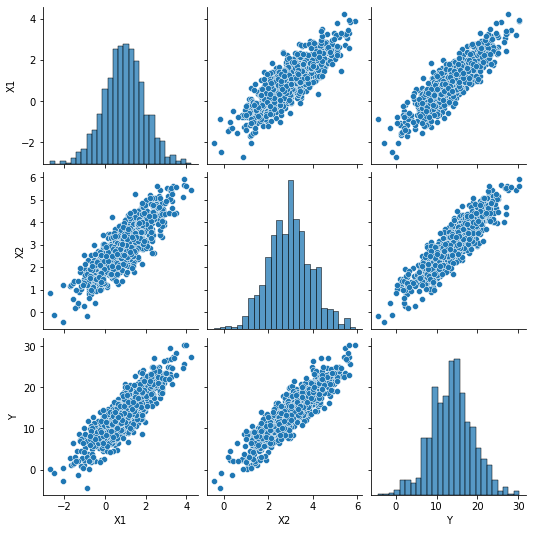

In [29]:
sns.pairplot(multi_variate_corr_data[["X1", "X2", "Y"]])

* The distribution of X1, X2 and Y all looks like they follow normal distribution.
* The scatter plots shows that the variables are positively correlated to each other. X1 and X2, X2 and Y and X1 and Y all looks to be positively correlated.

✅ Fit a linear regression for $y ∼ x_1 + x_2$.  How well does it fit? Do its assumptions hold?

In [30]:
multi_variate_corr_data_model = smf.ols("Y ~ X1 + X2", data = multi_variate_corr_data)
multi_variate_corr_data_model_fit = multi_variate_corr_data_model.fit()
multi_variate_corr_data_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     2773.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:24:26   Log-Likelihood:                -2117.5
No. Observations:                1000   AIC:                             4241.
Df Residuals:                     997   BIC:                             4256.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3561      0.278     12.078      0.000       2.811       3.901
X1             2.1275      0.120     17.765      0.000       1.892       2.362
X2             2.8406      0.121     23.386      0.000       2.602       3.079
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.999
Skew:                          -0.088   Prob(JB):                        0.368
Kurtosis:                       3.130   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value used for intercept is 3, the coefficient of X1 is 2, and the coefficient of X2 is 3.
* The intercept is 3.3561, the coefficient of X1 is 2.1275, and the coefficient of X2 is 2.8406. The model value is almost equal to the actual values.
* The $R^2$ value is 0.848. This indicates that almost 84.8% of the data is explained by this model.

The model almost explains 85% variance of the dependent data. Thus, this model can be considered a good fit.


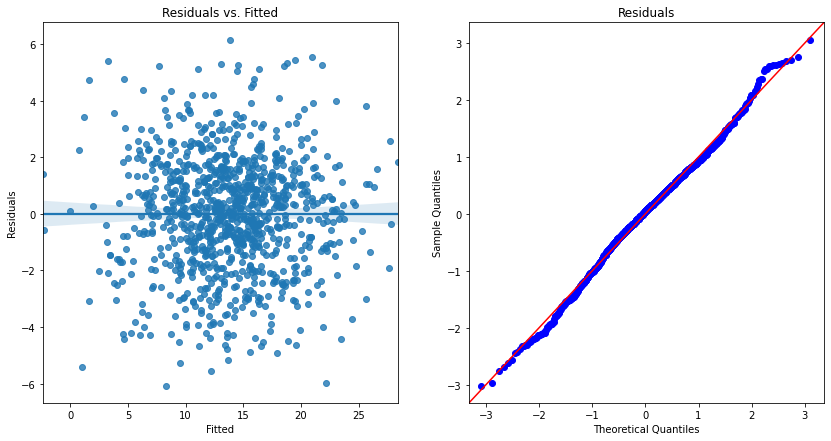

In [31]:
draw_assumption_check_plot(multi_variate_corr_data_model_fit)

* Assumptions check
  * Points are almost equally distributed above and below the regression line showing no specific pattern in Fitted vs Residual plot. Thus Homoskedasticity property of errors is not violated.
  * The Q-Q plot shows that errors seem to have a normal distributions with some outliers at the start and end. Hence, we can say that errors are distributed normally.

Thus, the assumption for the linear model does hold for the data. Almost 85% of the dependent variable can be while using this model. Thus, the linear model is a good fit.

✅ Run this simulation (drawing 1000 variables and fitting a linear model) 100 times. Show the mean, variance, and appropriate distribution plots of the estimated intercepts and coefficients (for $x_1$ and $x_2$).

                  Mean  Variance                    Confidence Interval  Confidence Interval Width
Coefficients                                                                                      
Intercept     2.992370  0.080955  2.425582732546152, 3.4637697770186118                   1.038187
X1            2.005772  0.015291  1.7538706047543728, 2.285062271561659                   0.531192
X2            2.998818  0.015020  2.756765581591888, 3.2487749145070097                   0.492009


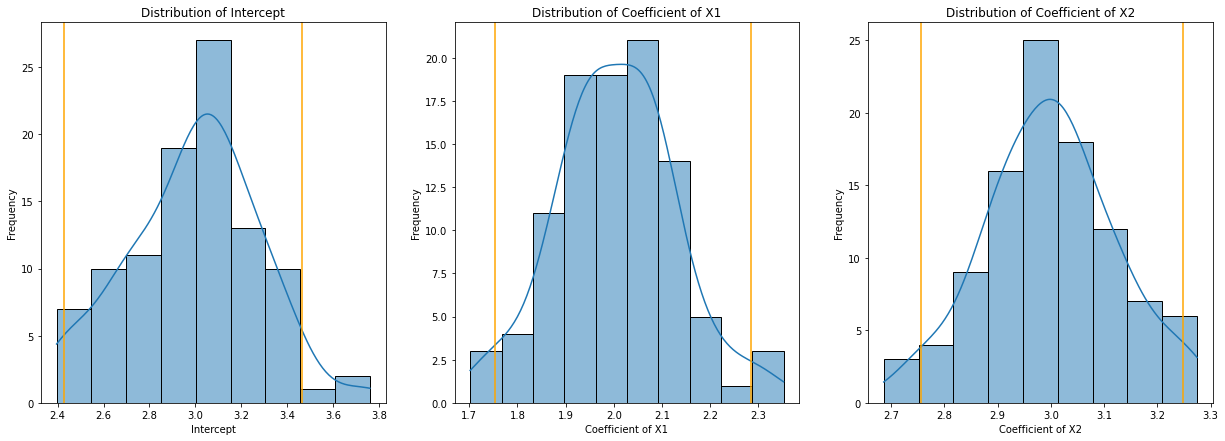

In [32]:
simulate_correlated_predictors()

The value used for intercept is 3, the coefficient of X1 is 2, and the coefficient of X2 is 3.
* The mean intercept is 2.992370 and the variance is 0.080955.
* The mean coefficient X1 is 2.005772 and the variance is. 0.015291.
* The mean coefficient X2 is 2.998818 and the variance is. 0.015020.
* Distribution of Intercept, coefficient X1 and coefficient X2 is normal and is shown with confidence intervals respectively.

✅ Repeat the repeated simulation for a variety of different covariances from 0 to 1 (including at least 0, 0.9, 0.99, and 0.999). Create line plots (or a single line plot with multiple colors) that show how the variance of the estimated regression parameters (intercept and $x_1$ and $x_2$ coefficients) change as you increase the correlation (covariance) between $X_1$ and $X_2$    .

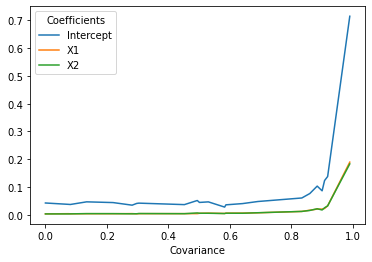

In [33]:
import random
cov = [float(f"{random.uniform(0,1):.3f}") for x in range(20)]
cov.extend([0.0, 0.9, 0.99, 0.99])
cov = list(set(cov))
cov.sort()
simulate__multiple_covariances(epoch=100, covariances=cov)


* 25 random covariances were selected containing some specific values.
* In the line chart, we can see that the variance is almost constant for for the increasing value of covariance between X1 and X2 upto 0.9 with a sudden increase in the value of variance of the coefficient as covariance is increased beyond 0.9.

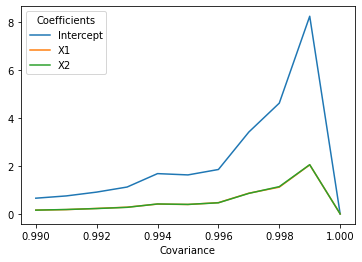

In [34]:
cov=  [0.990, 0.991,0.992, .993, 0.994, 0.995, 0.996, 0.997, 0.998,  0.999, 1]
simulate__multiple_covariances(epoch=100, covariances=cov)

We can see that variance almost remains constant or increases very slowly for covariance upto 0.995 with a sharp increase upto 0.999 and a sharp decrease of variance upto 1. The variance nears to zero.

## Reflection

The primary purpose of this assignment was to get a hands on experience about linear regression and simulation to study statistical techniques. The data needed for this task was pseudorandom numbers those were generated using some random number generators. We then apply statistical techniques such as correlation and  linear regression to these synthetic data and see how closely the result matches  the known parameters.

Firstly, correlation were simulated between uncorrelated and correlated variables respectively and the values were observed. We learned that how the sample size plays its role to lessen the variance of the statistical measure. Other thing we learned is about fitting a linear model into a data we have. We used various data such as linear data, non-linear data for single regression and tried to fit a linear model through them. We learned about evaluating whether a linear is a good fit or not and assess the linear model assumption of the linear model. Parameters such as $R^2$ is useful to evaluate the fit of the model. Higher the value, more the model explains the variance of data. Similarly, we learned about using scatter plots, Residual vs Fitted plots and QQ plots to access the linear model assumptions. Other thing we learned is about how multiple parameters can be used to build a model to predict the value. Evaluating the model using $R^2$ measure and using various plots to evaluate the model assumption. We also learned about the effect of the correlation between to independent variables on the variance of the coefficients and intercepts of the model.